Please **submit this Jupyter notebook through Canvas** no later than **Monday November 16, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Daniël Vink - 10675140 \
Sam Kuilboer - 12442690

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [1]:
import numpy as np

t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

General form of a straight line equation: $y = ax + b$ \
General form of a quadratic function: $y = ax^2 + bx + c$ \
General form of a cubic function: $y = ax^3 + bx^2 + cx + d$

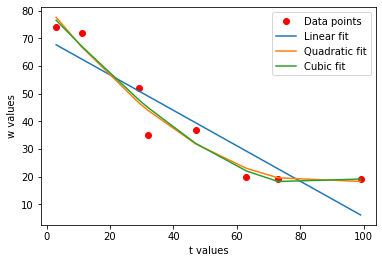

In [2]:
import numpy.linalg as la
import matplotlib.pyplot as plt

''' Data is fitted by solving the linear equation w = Ax for x.
A takes the shape of the t-values of every point on its row, with an added 1 to accommodate the added constant
from the general equation. The resulting vector x contains the fitted coefficients.
'''

# Linear fit
straight_A = np.array([t, np.ones(len(t))]).T
a_1, b_1 = la.lstsq(straight_A, w, rcond=None)[0]

# Quadratic fit
quadr_A = np.array([t**2, t, np.ones(len(t))]).T
a_2, b_2, c_2 = la.lstsq(quadr_A, w, rcond=None)[0]

# Cubic fit
cubic_A = np.array([t**3, t**2, t, np.ones(len(t))]).T
a_3, b_3, c_3, d_3 = la.lstsq(cubic_A, w, rcond=None)[0]

# Plot
plt.plot(t, w, 'ro', label='Data points')
plt.plot(t, a_1*t + b_1, label='Linear fit')
plt.plot(t, a_2*t**2 + b_2*t + c_2, label='Quadratic fit')
plt.plot(t, a_3*t**3 + b_3*t**2 + c_3*t + d_3, label='Cubic fit')
plt.legend()
plt.ylabel("w values")
plt.xlabel("t values")
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [3]:
''' Because the order is unspecified, we calculated the 2nd order condition number of the above 
created A (Vandermonde) matrices. 
'''
cond_linear = la.cond(straight_A)
cond_quadr = la.cond(quadr_A)
cond_cubic = la.cond(cubic_A)

print('Condition number (2nd Order) of the linear Vandermonde-matrix: ', cond_linear)
print('Condition number (2nd Order) of the quadratic Vandermonde-matrix: ', cond_quadr)
print('Condition number (2nd Order) of the cubic Vandermonde-matrix: ', cond_cubic)

print('As you can see, the matrices are poorly conditioned and can lead to large errors.')

Condition number (2nd Order) of the linear Vandermonde-matrix:  95.97978844376208
Condition number (2nd Order) of the quadratic Vandermonde-matrix:  10562.214789189062
Condition number (2nd Order) of the cubic Vandermonde-matrix:  1192946.877148659
As you can see, the matrices are poorly conditioned and can lead to large errors.


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

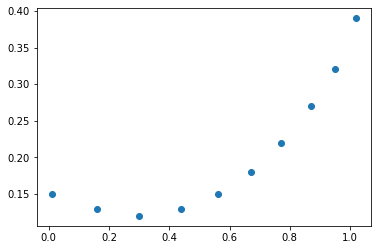

In [4]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

import matplotlib.pyplot as plt
t = np.linspace(0, 2*np.pi, 101)

plt.scatter(x,y)
plt.show()

In [5]:
ellips_A = np.array([y**2, x*y, x, y, np.ones(len(x))]).T
a, b, c, d, e = la.lstsq(ellips_A, x**2, rcond=None)[0]
print('Coefficients: ')
print('a: ', a)
print('b: ', b)
print('c: ', c)
print('d: ', d)
print('e: ', e)

Coefficients: 
a:  -2.6356254837121007
b:  0.14364618259889303
c:  0.5514469631403579
d:  3.2229403381058948
e:  -0.4328942702644502


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)


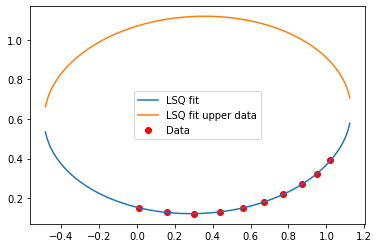

In [6]:
# We need sympy to solve the ellipse equation for y.
from sympy import *

def solve_for_y(a, b, c, d, e):
    ''' Solves the ellipse equation for the variable y.
    First it solves the equation for 0 and then for y with the given coefficients. Returns two functions
    since for every value of x, this equation has two values for y. 
    '''
    x, y = symbols('x y')
    # Solve ellipse for 0, so pull x**2 to the left side of the equation.
    ellipse = a*y**2 + b*x*y + c*x + d*y + e - x**2
    solutions = solve(ellipse, y)
    # Solution gives the equations for the two possible values.
    f0 = lambdify([x], solutions[0])
    f1 = lambdify([x], solutions[1])
    return f0, f1

f0, f1 = solve_for_y(a, b, c, d, e)
t = np.linspace(-0.5, 1.2, 201) # Space of x for to solve the equation for.
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)


plt.scatter(x, y, color='r', label='Data')
plt.plot(t, f0(t), label='LSQ fit')
plt.plot(t, f1(t), label='LSQ fit upper data')
plt.legend()
plt.show()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

Coefficient comparison: 
a:  -2.6356254837121007  | Noisy a:  -3.227185109515388
b:  0.14364618259889303  | Noisy b:  0.3462883491380942
c:  0.5514469631403579   | Noisy c:  0.5227258855587947
d:  3.2229403381058948   | Noisy d:  3.307985364813766
e:  -0.4328942702644502  | Noisy e:  -0.43279686770247516


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x + 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


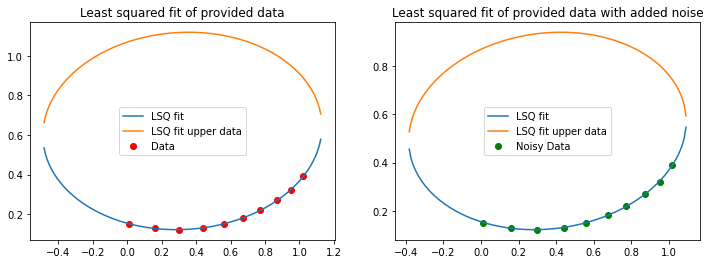

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x + 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


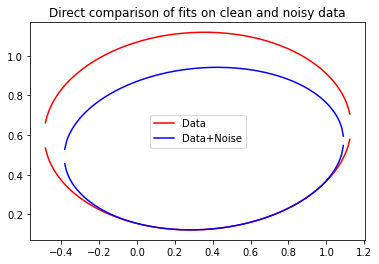

In [7]:
np.random.seed(7) # Reproduction

noise = np.random.uniform(-0.005, 0.005, len(x))
noisy_x = x + noise
noise = np.random.uniform(-0.005, 0.005, len(y))
noisy_y = y + noise

# Uncertain if noise should be added to y as well.
ellips_noisy_A = np.array([y**2, noisy_x*y, noisy_x, y, np.ones(len(noisy_x))]).T
# ellips_noisy_A = np.array([noisy_y**2, noisy_x*noisy_y, noisy_x, noisy_y, np.ones(len(noisy_x))]).T

na, nb, nc, nd, ne = la.lstsq(ellips_noisy_A, noisy_x**2, rcond=None)[0]

print('Coefficient comparison: ')
print('a: ', a, ' | Noisy a: ', na)
print('b: ', b, ' | Noisy b: ', nb)
print('c: ', c, '  | Noisy c: ', nc)
print('d: ', d, '  | Noisy d: ', nd)
print('e: ', e, ' | Noisy e: ', ne)

nf0, nf1 = solve_for_y(na, nb, nc, nd, ne)

x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(x, y, color='r', label='Data')
ax1.plot(t, f0(t), label='LSQ fit')
ax1.plot(t, f1(t), label='LSQ fit upper data')

ax2.scatter(noisy_x, y, color='g', label='Noisy Data')
ax2.plot(t, nf0(t), label='LSQ fit')
ax2.plot(t, nf1(t), label='LSQ fit upper data')

ax1.set(title="Least squared fit of provided data")
ax2.set(title="Least squared fit of provided data with added noise")
ax1.legend(), ax2.legend()
plt.show()

plt.plot(t, f0(t), 'r', label='Data')
plt.plot(t, f1(t), 'r')
plt.plot(t, nf0(t), 'b', label='Data+Noise')
plt.plot(t, nf1(t), 'b')
plt.title("Direct comparison of fits on clean and noisy data")
plt.legend()
plt.show()

## (c)
Can you explain this behaviour?

The fitted orbits are still very similar, but as you can see from the direct comparison, the added noise has made the plot somewhat scaled down. If we directly compare the fitted coefficients, we see the largest difference in the a and b parameters. This makes sense intuitively, because these are the coefficients that are associated with $y^2$ and $x*y$, both products of input data, so added noise will be amplified here.
Compared directly to the graph, a large difference in $

In [8]:
clean_lfit = np.array(f0(t))
noisy_lfit = np.array(nf0(t))

nan_clean = ~ np.isnan(clean_lfit)
print(np.min(clean_lfit[nan_clean]))

nan_noisy = ~np.isnan(noisy_lfit)
print(np.min(noisy_lfit[nan_noisy]))


0.12123662574298472
0.12103014024931824


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

Coefficient comparison: 
a:  0.10441934702027508  | Noisy a:  0.1037047120078354
b:  0.3401366097154849  | Noisy b:  0.3382152987610322
c:  0.8917887094168323   | Noisy c:  0.8906236494006436
d:  0.2024879309777449   | Noisy d:  0.20139907973271337
e:  -0.17178938756063344  | Noisy e:  -0.17019333095131545
Coefficient comparison: 
a:  0.4191648784357853  | Noisy a:  0.4125333162740636
b:  0.8768712738778572  | Noisy b:  0.8628734905628928
c:  0.5253450105330469   | Noisy c:  0.5332444218613576
d:  0.756138531245886   | Noisy d:  0.7444827863273856
e:  -0.16744777429279703  | Noisy e:  -0.16689957422922427
Coefficient comparison: 
a:  -2.6356254837121007  | Noisy a:  -3.227185109515388
b:  0.14364618259889303  | Noisy b:  0.3462883491380942
c:  0.5514469631403579   | Noisy c:  0.5227258855587947
d:  3.2229403381058948   | Noisy d:  3.307985364813766
e:  -0.4328942702644502  | Noisy e:  -0.43279686770247516


<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x + 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


Coefficient comparison: 
a:  -2.6356254837121007  | Noisy a:  -3.227185109515388
b:  0.14364618259889303  | Noisy b:  0.3462883491380942
c:  0.5514469631403579   | Noisy c:  0.5227258855587947
d:  3.2229403381058948   | Noisy d:  3.307985364813766
e:  -0.4328942702644502  | Noisy e:  -0.43279686770247516


<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)
<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x + 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


Coefficient comparison: 
a:  -2.6356254837121007  | Noisy a:  -3.227185109515388
b:  0.14364618259889303  | Noisy b:  0.3462883491380942
c:  0.5514469631403579   | Noisy c:  0.5227258855587947
d:  3.2229403381058948   | Noisy d:  3.307985364813766
e:  -0.4328942702644502  | Noisy e:  -0.43279686770247516


<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x - 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-22>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0272508714699057*x + 0.615364905788255*sqrt(-x**2 + 0.640528565350396*x + 0.553471674626798) + 0.611418495917447)
<lambdifygenerated-23>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x - 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)
<lambdifygenerated-24>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.0536517642135028*x + 0.554065930888953*sqrt(-x**2 + 0.706770675801804*x + 0.418795692548252) + 0.512518689284377)


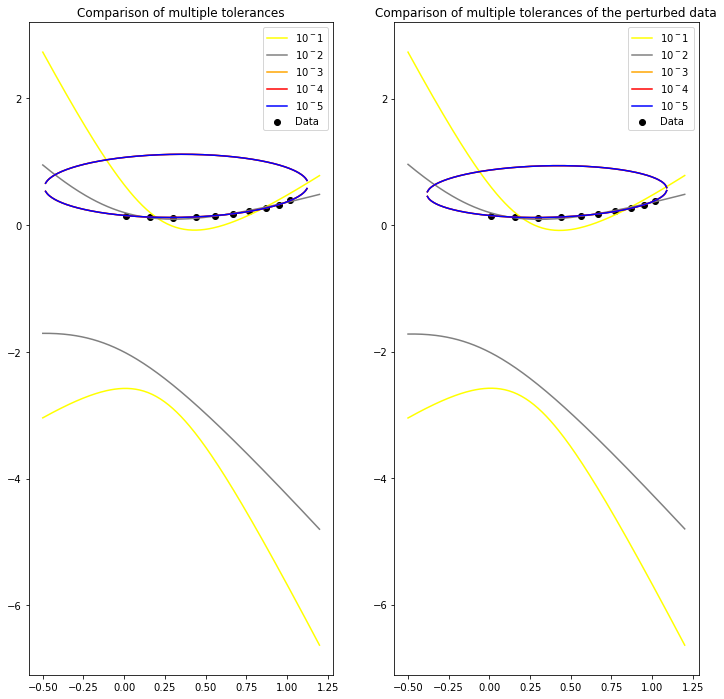

In [9]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

def create_noise(x, y, seed=7):
    np.random.seed(seed)
    ns_x = np.random.uniform(-0.005, 0.005, len(x))
    noisy_x = x + ns_x
    ns_y = np.random.uniform(-.005, 0.005, len(x))
    noisy_y = y + ns_y
    return noisy_x, noisy_y
    
def calculate_coefficients(x, y, noisy_x, noisy_y, rcond_k=None):
    
    if rcond_k is not None:
        RCOND = 10**-rcond_k
    else:
        RCOND = None
    
    ellips_A = np.array([y**2, x*y, x, y, np.ones(len(x))]).T
    a, b, c, d, e = la.lstsq(ellips_A, x**2, rcond=RCOND)[0]
    
    ellips_noisy_A = np.array([y**2, noisy_x*y, noisy_x, y, np.ones(len(noisy_x))]).T
    na, nb, nc, nd, ne = la.lstsq(ellips_noisy_A, noisy_x**2, rcond=RCOND)[0]
    
    print('Coefficient comparison: ')
    print('a: ', a, ' | Noisy a: ', na)
    print('b: ', b, ' | Noisy b: ', nb)
    print('c: ', c, '  | Noisy c: ', nc)
    print('d: ', d, '  | Noisy d: ', nd)
    print('e: ', e, ' | Noisy e: ', ne)
    
    return [a, b, c, d, e], [na, nb, nc, nd, ne]
    
def draw_figures(f0, f1, nf0, nf1):
    t = np.linspace(-0.5, 1.2, 201) # Space of x for to solve the equation for.
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.scatter(x, y, color='r', label='Data')
    ax1.plot(t, f0(t), label='LSQ fit')
    ax1.plot(t, f1(t), label='LSQ fit upper data')

    ax2.scatter(noisy_x, y, color='g', label='Noisy Data')
    ax2.plot(t, nf0(t), label='LSQ fit')
    ax2.plot(t, nf1(t), label='LSQ fit upper data')

    ax1.set(title="Least squared fit of provided data")
    ax2.set(title="Least squared fit of provided data with added noise")
    ax1.legend(), ax2.legend()
    plt.show()
    
tolerance = [1,2,3,4,5]
colors = ['yellow', 'grey', 'orange', 'red', 'blue']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.scatter(x, y, color='black', label='Data')
ax2.scatter(x, y, color='black', label='Data')

for k in tolerance:
    X, Y = create_noise(x, y)
    li_A, li_noisy_A = calculate_coefficients(x, y, X, Y, k)
    f0, f1 = solve_for_y(li_A[0], li_A[1], li_A[2], li_A[3], li_A[4])
    nf0, nf1 = solve_for_y(li_noisy_A[0], li_noisy_A[1], li_noisy_A[2], li_noisy_A[3], li_noisy_A[4])
#     draw_figures(f0, f1, nf0, nf1)
    
    ax1.plot(t, f0(t), colors[k-1], label=f'$10^-{k}$')
    ax1.plot(t, f1(t), colors[k-1])
    
    ax2.plot(t, nf0(t), colors[k-1], label=f'$10^-{k}$')
    ax2.plot(t, nf1(t), colors[k-1])

ax1.set(title='Comparison of multiple tolerances')
ax2.set(title='Comparison of multiple tolerances of the perturbed data')
ax1.legend(), ax2.legend()
plt.show()
    
    

In [6]:
(9/7)--0.8746*((((9/7)- 2))/(-0.8746-5))

1.3920558724970942

The orbits fit the data better with higher tolerance